# Dimension reduction

In [49]:
# %load /home/dan/.jupyter/firstcell.py 
%load_ext autoreload
%autoreload 2

import sys
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

font = {'size'   : 14}
mpl.rc('font', **font)

import numpy as np
import pandas as pd

from scipy import stats
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# You will need to install PHATE and scprep to run this. You can use:
# !pip install --user -U phate scprep

In [3]:
# %load /home/dan/.jupyter/sc.py
import phate
import umap
import scprep

from sklearn.decomposition import PCA


In [4]:
import sys
sys.path.append("..")
from blog_tools import data, embed, interact
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import phate
import scprep
import ipywidgets as widgets
import warnings

In [5]:
algorithms = embed.__all__

## Download the data

To run this notebook you need to first download the processed genotype matrix created using [scripts from Alex Diaz-Papkovich](https://github.com/diazale/1KGP_dimred).

We have put the data on Google Drive. Unforunately there's not an easy way to automatically download the files through Python. Thankfully Jupyter lets us run this fancy cell magic:

In [6]:
%%bash
DLPATH='/home/user/' # Put download path here
wget --header 'Host: doc-04-80-docs.googleusercontent.com' \
  --user-agent 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:67.0) Gecko/20100101 Firefox/67.0' \
  --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' \
  --header 'Accept-Language: en-US,en;q=0.5' \
  --referer 'https://drive.google.com/' \
  --header 'DNT: 1' \
  --header 'Upgrade-Insecure-Requests: 1' 'https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jdn7q438g3v4kof3tn8jrof9tlt9gjlm/1563746400000/05324827116133114964/*/1KDK_t2SELsjJE03KjRJ5FHBsaplvh2uL?e=download' \
  --output-document $DLPATH/'transposed_genotype_matrix.npz'

--2019-07-21 18:52:23--  https://doc-04-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jdn7q438g3v4kof3tn8jrof9tlt9gjlm/1563746400000/05324827116133114964/*/1KDK_t2SELsjJE03KjRJ5FHBsaplvh2uL?e=download
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving doc-04-80-docs.googleusercontent.com (doc-04-80-docs.googleusercontent.com)... 172.217.5.225
Connecting to doc-04-80-docs.googleusercontent.com (doc-04-80-docs.googleusercontent.com)|172.217.5.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip]
Saving to: ‘/home/user//transposed_genotype_matrix.npz’

     0K .......... .......... .......... .......... .......... 3.60M
    50K .......... .......... .......... .......... .......... 7.41M
   100K .......... .......... .......... .......... .......... 12.4M
   150K .......... .......... .......... .......... .......... 13.4M
   200K .......... .......... .......... .......... .......... 

If that cell doesn't work, then you can manually download from this link: https://drive.google.com/open?id=1KDK_t2SELsjJE03KjRJ5FHBsaplvh2uL

#### Load preprocessed genotype matrix

In [7]:
d = np.load('/home/dan/burkhardt/1KGP_dimred/data/transposed_genotype_matrix.npz', allow_pickle=True)

In [8]:
# Assign colours to each ethnicity, roughly themed according to continent
# The Category20b palette has a bunch of groups of 4 shades in the same colour range
color_dict = {'CDX': '#393b79',
 'CHB': '#5254a3',
 'JPT': '#6b6ecf',
 'KHV': '#9c9ede',
 'CHS': '#9e9ac8',
 'BEB': '#637939',
 'GIH': '#8ca252',
 'ITU': '#b5cf6b',
 'PJL': '#cedb9c',
 'STU': '#c7e9c0',
 'ASW': '#8c6d31',
 'ACB': '#bd9e39',
 'ESN': '#e7ba52',
 'GWD': '#e7cb94',
 'LWK': '#7f3b08',
 'MSL': '#b35806',
 'YRI': '#e08214',
 'GBR': '#843c39',
 'FIN': '#ad494a',
 'IBS': '#d6616b',
 'TSI': '#e7969c',
 'CEU': '#d6604d',
 'CLM': '#7b4173',
 'MXL': '#a55194',
 'PEL': '#ce6dbd',
 'PUR': '#de9ed6'}

In [9]:
transposed_genotype_matrix = d['transposed_genotype_matrix']
pop_labels = d['pop_labels']

### Run the algorithms

In [ ]:
embeddings = {}
for algorithm in algorithms:
    print(algorithm.__name__)
    Y = algorithm(transposed_genotype_matrix, is_graph=False)
    embeddings[algorithm.__name__] = Y

PCA
MDS
ISOMAP
TSNE


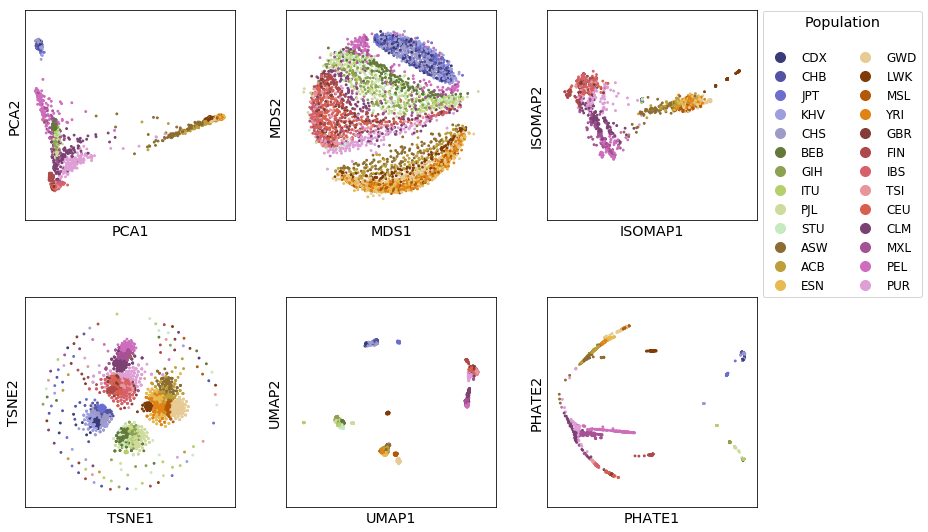

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(13, 7.5))

axes=axes.flatten()
for i, (algorithm, ax) in enumerate(zip(embeddings, axes)):
    if i == 2:
        legend = True
    else:
        legend = False
    
    scprep.plot.scatter2d(embeddings[algorithm], 
                          c=pop_labels, cmap=color_dict, ticks=False, 
                          label_prefix=algorithm, ax=ax,
                         title=None, legend=legend, legend_anchor=(1,1.025),
                         legend_title='Population\n')
    ax.set_aspect('equal', 'datalim')
    ax.margins(0.1)
    
fig.tight_layout(w_pad=3, h_pad=-3)
fig.savefig('../img/1000_genomes.comparison.2x3.png', dpi=300)

In [26]:
data_pca = PCA(10).fit_transform(transposed_genotype_matrix)

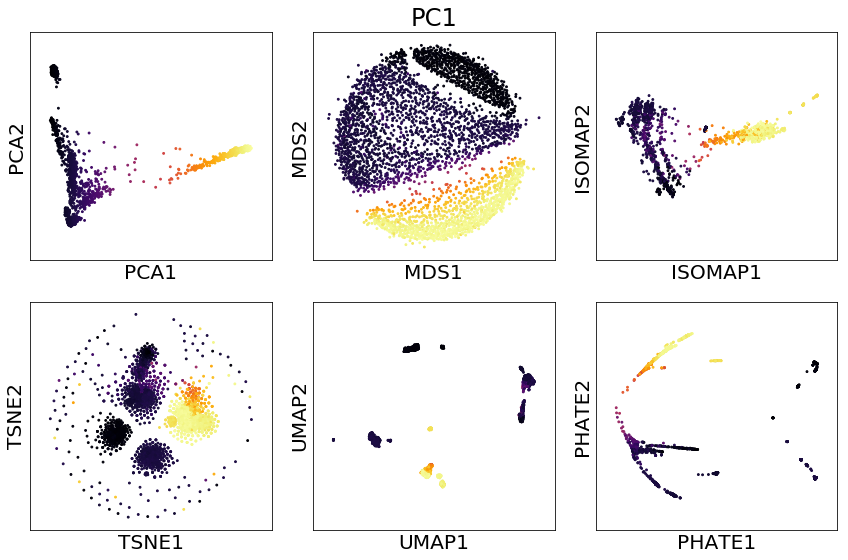

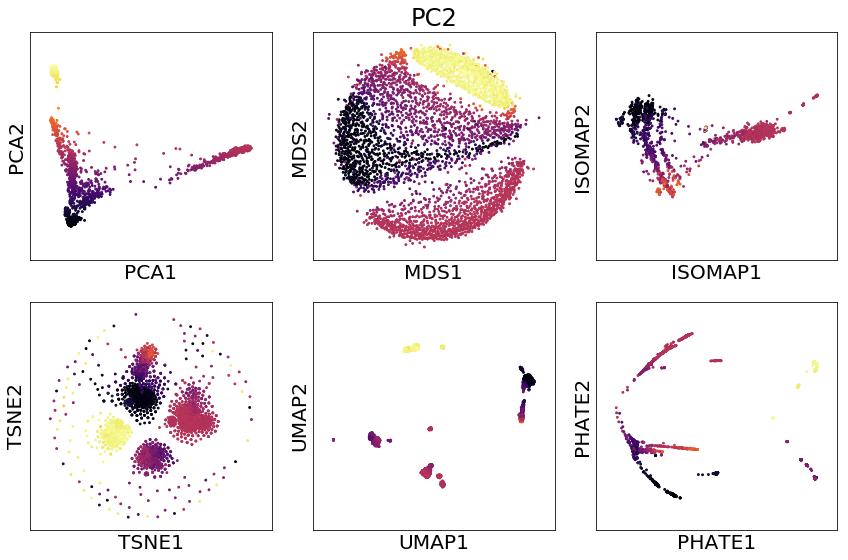

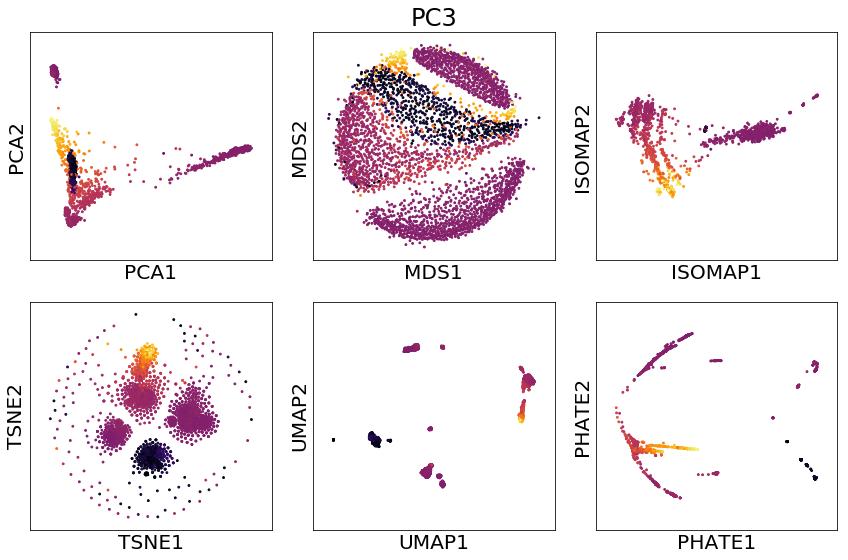

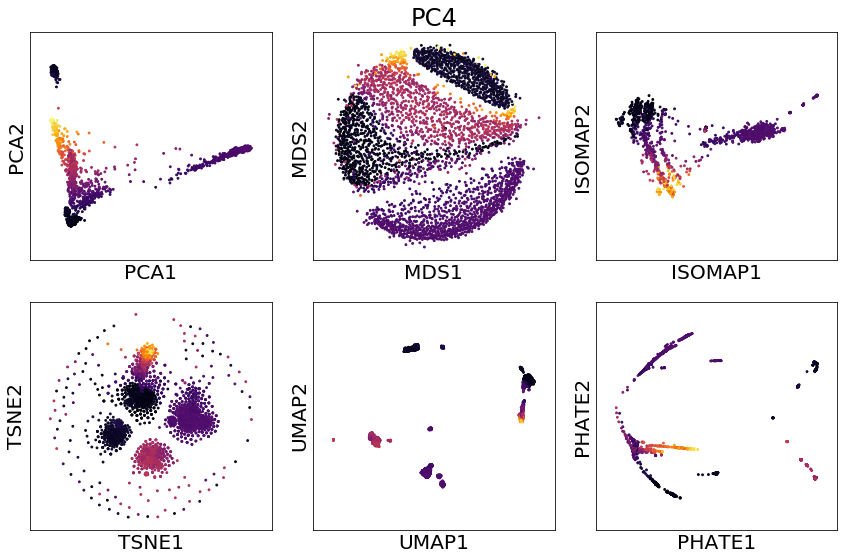

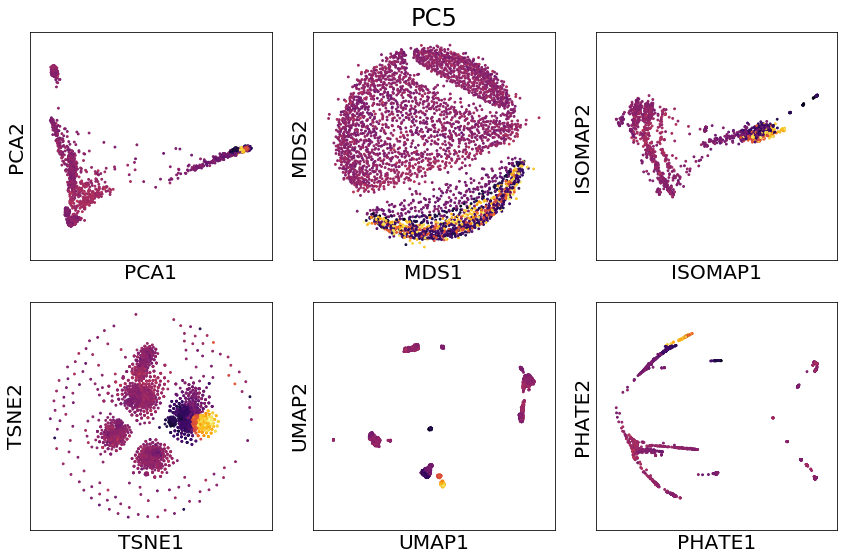

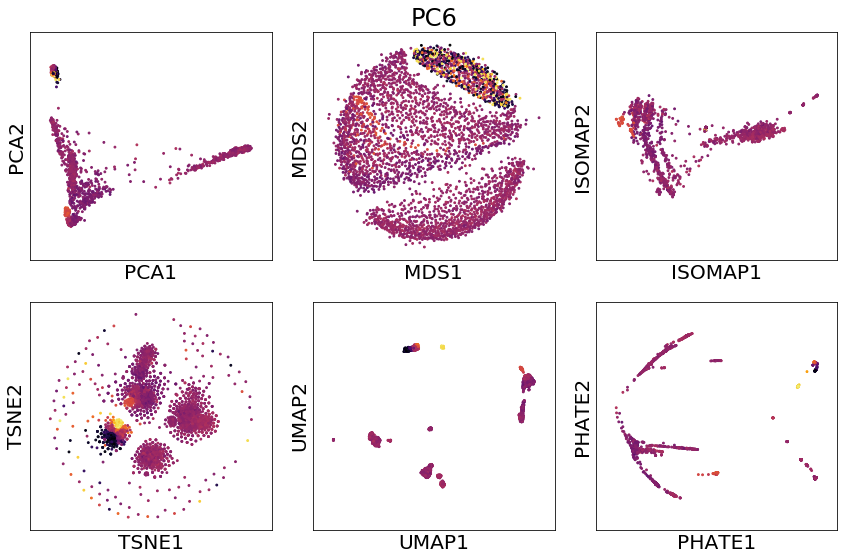

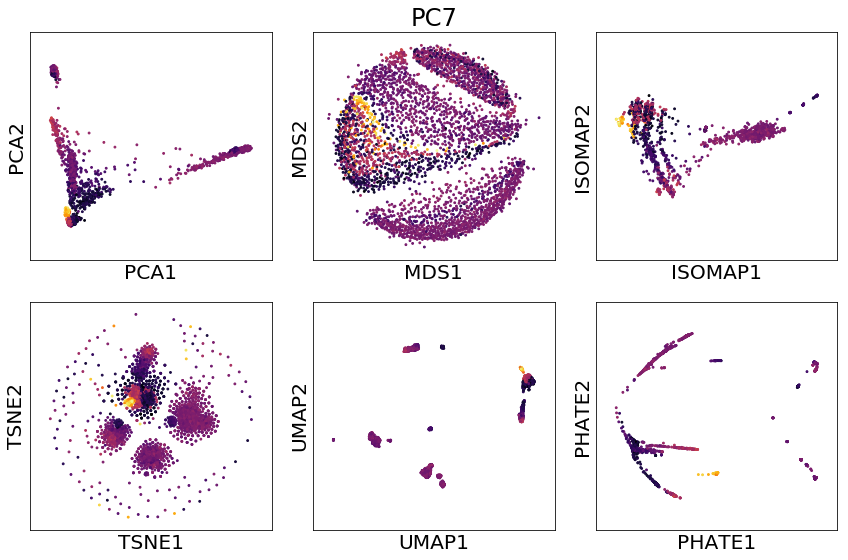

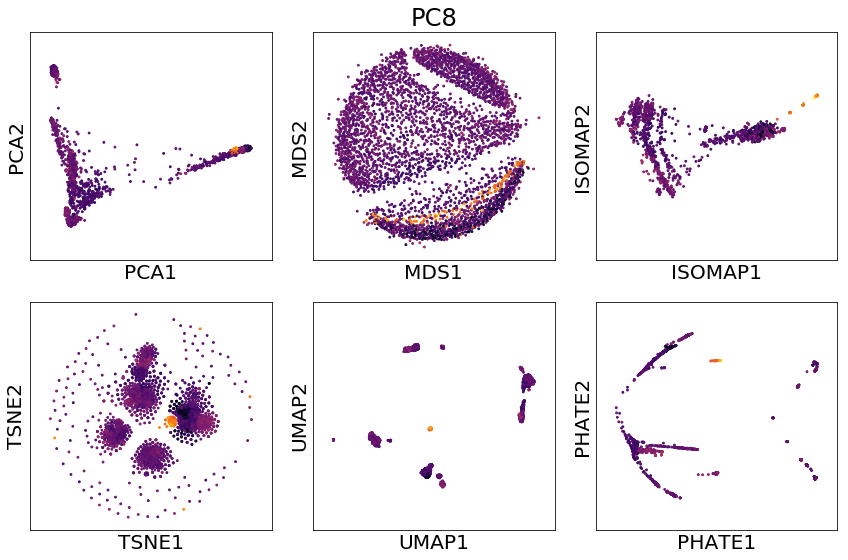

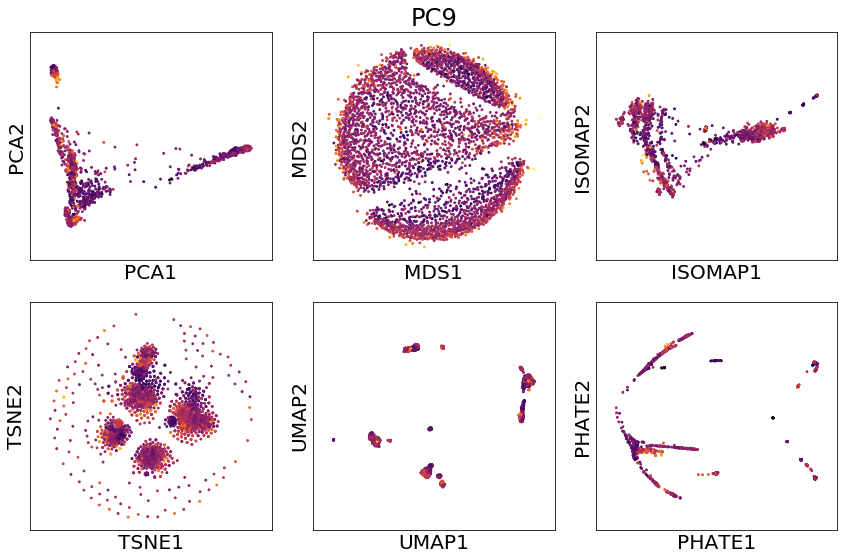

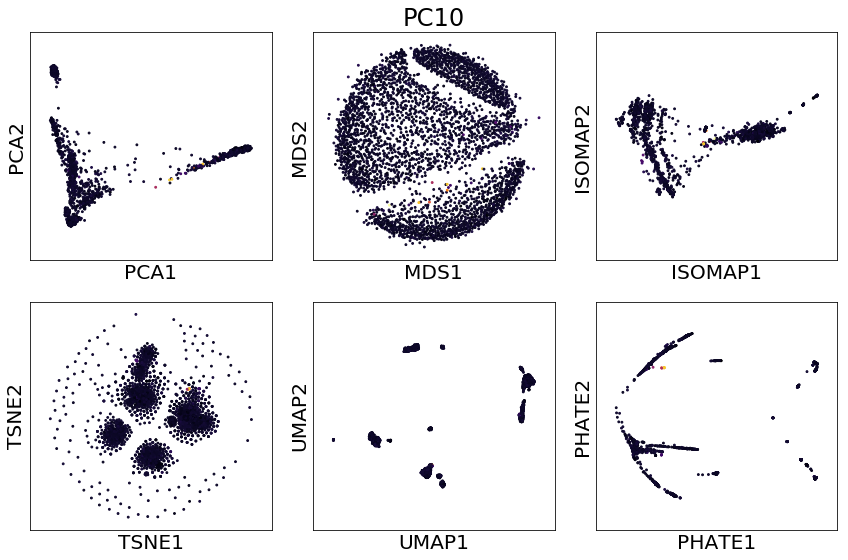

In [50]:
for pc_idx in range(10):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    
    axes=axes.flatten()
    for i, (algorithm, ax) in enumerate(zip(embeddings, axes)):
        if algorithm == 'MDS':
            title='PC{}'.format(pc_idx + 1)
        else:
            title=None
        
        scprep.plot.scatter2d(embeddings[algorithm], 
                              c=data_pca[:,pc_idx], ticks=False, 
                              label_prefix=algorithm, ax=ax,
                             title=title, legend=False, legend_anchor=(1,1.025),
                             legend_title='Population\n')
        ax.set_aspect('equal', 'datalim')
        ax.margins(0.1)
        
    fig.tight_layout()
    fig.savefig('../img/1000_genomes.comparison.PC{}.png'.format(pc_idx + 1), dpi=300)

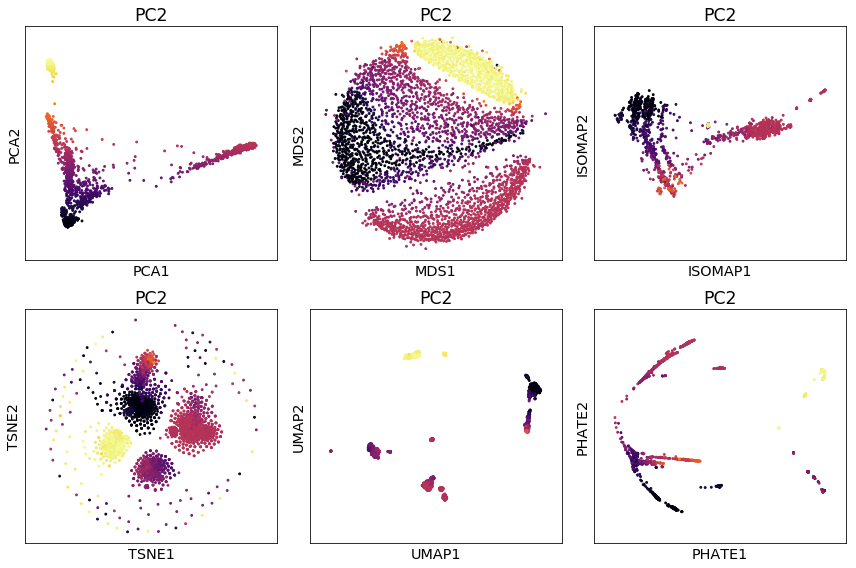

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes=axes.flatten()
for i, (algorithm, ax) in enumerate(zip(embeddings, axes)):
    if i == 2:
        legend = True
    else:
        legend = False
    
    scprep.plot.scatter2d(embeddings[algorithm], 
                          c=data_pca[:,1], ticks=False, 
                          label_prefix=algorithm, ax=ax,
                         title='PC2', legend=False, legend_anchor=(1,1.025),
                         legend_title='Population\n')
    ax.set_aspect('equal', 'datalim')
    ax.margins(0.1)
    
fig.tight_layout()
fig.savefig('../img/1000_genomes.comparison.PC2.png', dpi=300)

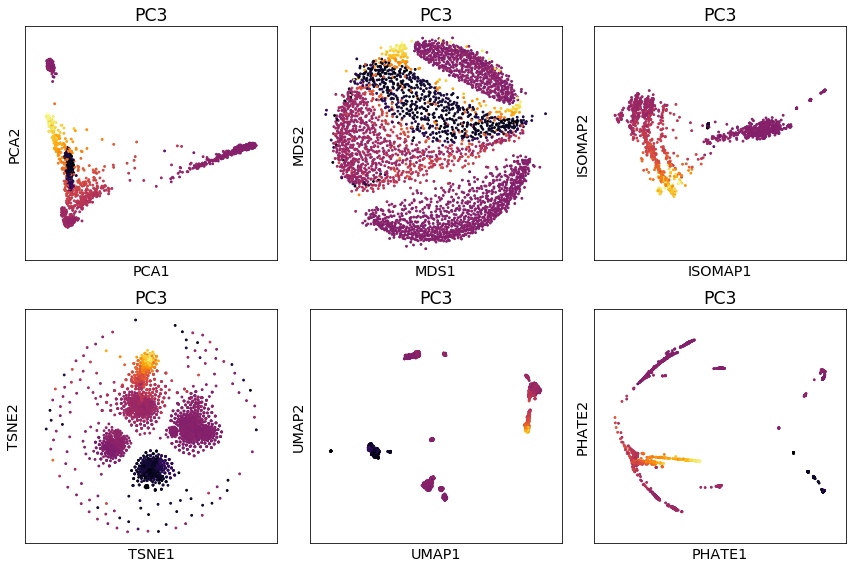

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes=axes.flatten()
for i, (algorithm, ax) in enumerate(zip(embeddings, axes)):
    if i == 2:
        legend = True
    else:
        legend = False
    
    scprep.plot.scatter2d(embeddings[algorithm], 
                          c=data_pca[:,2], ticks=False, 
                          label_prefix=algorithm, ax=ax,
                         title='PC3', legend=False, legend_anchor=(1,1.025),
                         legend_title='Population\n')
    ax.set_aspect('equal', 'datalim')
    ax.margins(0.1)
    
fig.tight_layout()
fig.savefig('../img/1000_genomes.comparison.PC3.png', dpi=300)

In [ ]:
import pickle

In [19]:
with open('../data/1000_genomes.embeddings.pkl', 'wb+') as f:
    pickle.dump(embeddings, f)

#### Comparing both methods run with default parameters using population color scheme

In [31]:
green_inds = np.isin(pop_labels, ['BEB','GIH', 'ITU','PJL','STU'])
purple_inds = np.isin(pop_labels, ['CLM','MXL', 'PEL','PUR'])

pca_var_purple = np.mean(np.var(data_pca[purple_inds, :15], axis=0))
pca_var_green = np.mean(np.var(data_pca[green_inds, :15], axis=0))

print(pca_var_purple, pca_var_green)

102.41883635966998 15.41156162513433


In [25]:
np.mean(np.var(transposed_genotype_matrix[purple_inds], axis=0))

np.mean(np.var(transposed_genotype_matrix[green_inds], axis=0))

0.29410857724653305

In [29]:
np.mean(np.var(data_pca[purple_inds, :15], axis=0)) , np.mean(np.var(data_pca[green_inds, :15], axis=0))

(102.41883635966998, 15.41156162513433)

(array([6.322e+03, 4.961e+03, 3.404e+03, 2.875e+03, 2.620e+03, 2.493e+03,
        2.450e+03, 2.565e+03, 2.434e+03, 2.444e+03, 2.516e+03, 2.546e+03,
        2.650e+03, 2.534e+03, 2.758e+03, 2.917e+03, 2.942e+03, 3.197e+03,
        3.531e+03, 3.828e+03, 4.581e+03, 5.639e+03, 6.242e+03, 4.469e+03,
        2.247e+03, 9.140e+02, 3.200e+02, 1.540e+02, 7.900e+01, 4.600e+01,
        4.500e+01, 1.500e+01, 2.300e+01, 1.200e+01, 9.000e+00, 7.000e+00,
        6.000e+00, 8.000e+00, 2.000e+00, 7.000e+00, 5.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

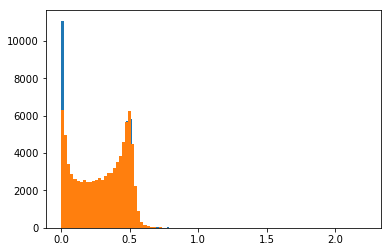

In [24]:
plt.hist(np.var(transposed_genotype_matrix[green_inds], axis=0), bins=100)

plt.hist(np.var(transposed_genotype_matrix[purple_inds], axis=0), bins=100)

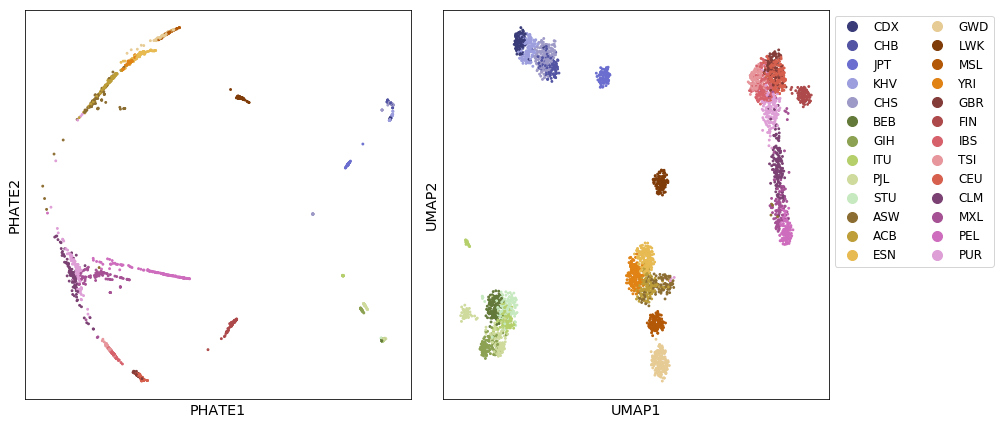

In [11]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

scprep.plot.scatter2d(data_phate, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='PHATE', ax=axes[0], legend=False)

scprep.plot.scatter2d(data_umap, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='UMAP', ax=axes[1],legend_anchor=(1,1))

fig.tight_layout()
fig.savefig('../img/PHATE_vs_UMAP.pop.png', dpi=300)

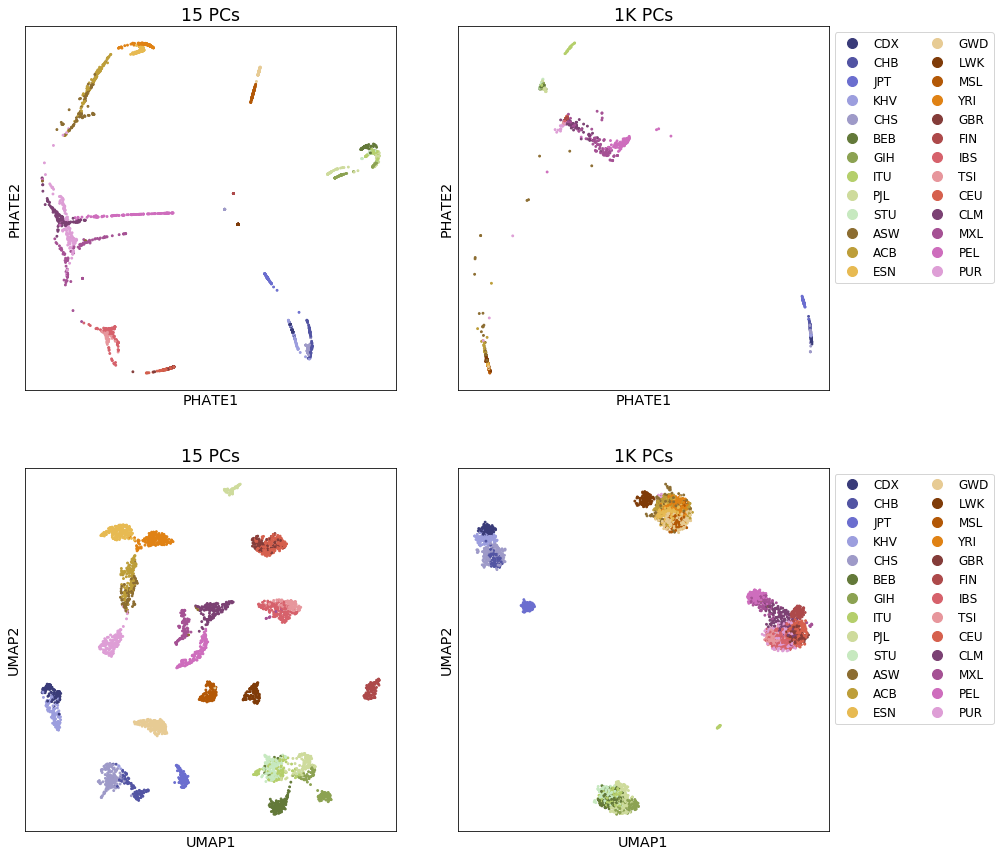

In [12]:
fig, axes = plt.subplots(2,2, figsize=(14,12))

scprep.plot.scatter2d(data_phate_pc15, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='PHATE', ax=axes[0,0], title='15 PCs', 
                      legend=False)

scprep.plot.scatter2d(data_phate_pc1k, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='PHATE', ax=axes[0,1],  title='1K PCs',
                      legend_anchor=(1,1))


scprep.plot.scatter2d(data_umap_pc15, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='UMAP', ax=axes[1,0], title='15 PCs', 
                      legend=False)

scprep.plot.scatter2d(data_umap_pc1k, c=pop_labels, cmap=color_dict, 
                      ticks=False, label_prefix='UMAP', ax=axes[1,1],  title='1K PCs',
                      legend_anchor=(1,1))

fig.tight_layout(w_pad=4,h_pad=4)
fig.savefig('../img/PHATE_vs_UMAP.n_pca.pop.png', dpi=300)

#### Looking at the ASW population

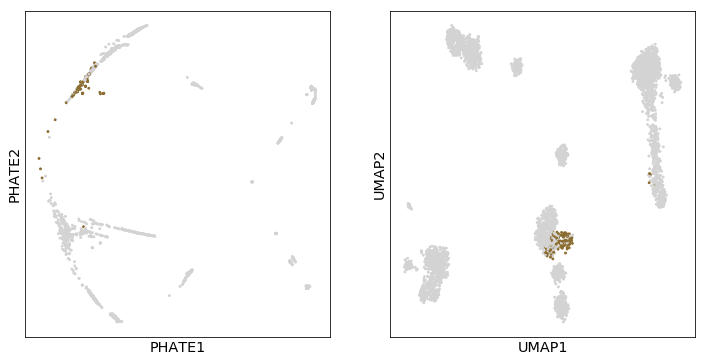

In [13]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

#Only show the color if the pop label == 'ASW'
is_asw_cmap = {pop:color_dict[pop] if pop == 'ASW' else 'lightgrey' for pop in color_dict}

scprep.plot.scatter2d(data_phate, c=pop_labels, cmap=is_asw_cmap,
                      ticks=False, label_prefix='PHATE', ax=axes[0], legend=False)

scprep.plot.scatter2d(data_umap,  c=pop_labels, cmap=is_asw_cmap,
                      ticks=False, label_prefix='UMAP', ax=axes[1], legend=False)

#### Examining PC loadings on the PHATE plot

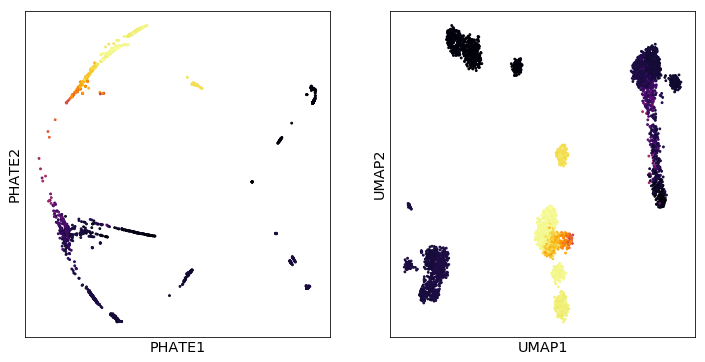

In [14]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

scprep.plot.scatter2d(data_phate, c=data_pca[:,0],
                      ticks=False, label_prefix='PHATE', ax=axes[0], legend=False)

scprep.plot.scatter2d(data_umap,  c=data_pca[:,0],
                      ticks=False, label_prefix='UMAP', ax=axes[1], legend=False)

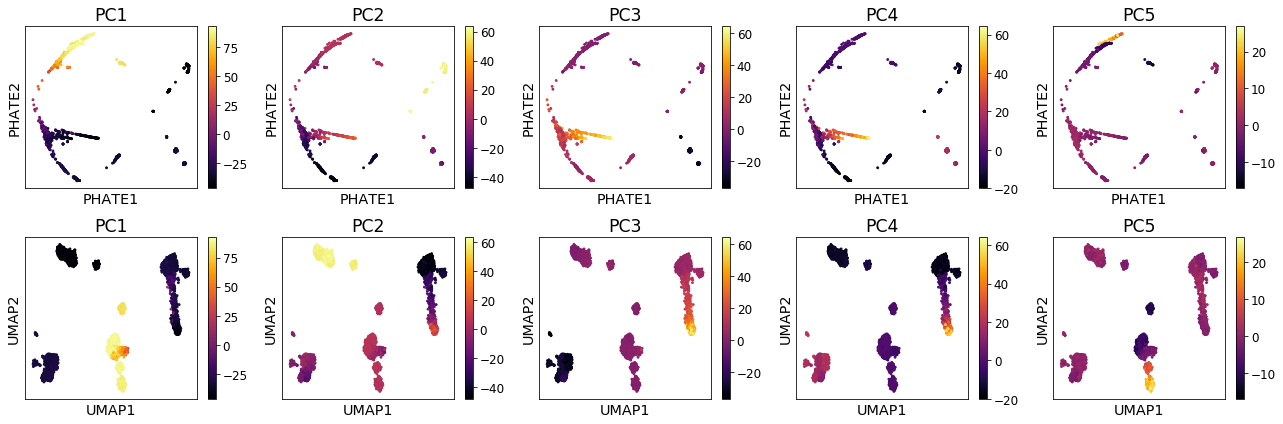

In [15]:
fig, axes = plt.subplots(2,5, figsize=(18,6))

for i in range(5):
    scprep.plot.scatter2d(data_phate, c=data_pca[:,i],
                      ticks=False, label_prefix='PHATE', ax=axes[0,i], legend=True,
                         title='PC{}'.format(i+1))

    scprep.plot.scatter2d(data_umap,  c=data_pca[:,i],
                      ticks=False, label_prefix='UMAP', ax=axes[1,i],legend_anchor=(1,1),
                         title='PC{}'.format(i+1))
    
fig.tight_layout()
fig.savefig('../img/PHATE_vs_UMAP.pcs.1-5.png', dpi=300)

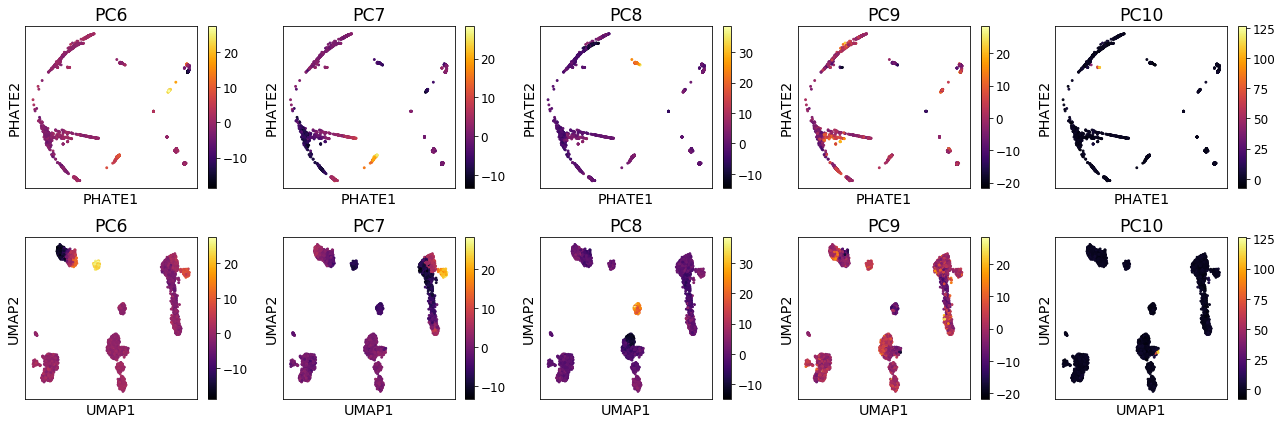

In [16]:
fig, axes = plt.subplots(2,5, figsize=(18,6))

for i in range(5):
    scprep.plot.scatter2d(data_phate, c=data_pca[:,i+5],
                      ticks=False, label_prefix='PHATE', ax=axes[0,i], legend=True,
                         title='PC{}'.format(i+6))

    scprep.plot.scatter2d(data_umap,  c=data_pca[:,i+5],
                      ticks=False, label_prefix='UMAP', ax=axes[1,i],legend_anchor=(1,1),
                         title='PC{}'.format(i+6))
    
fig.tight_layout()
fig.savefig('../img/PHATE_vs_UMAP.pcs.6-10.png', dpi=300)

### Comparing green vs purple groups

In [35]:
green_inds = np.isin(pop_labels, ['BEB','GIH', 'ITU','PJL','STU'])
purple_inds = np.isin(pop_labels, ['CLM','MXL', 'PEL','PUR'])

pca_var_purple = np.mean(np.var(data_pca[purple_inds, :15], axis=0))

pca_var_green = np.mean(np.var(data_pca[green_inds, :15], axis=0))

print(pca_var_purple, pca_var_green)

102.41883635966998 15.41156162513433


In [38]:
gr_pu_cmap = {pop:color_dict[pop] if pop in ['BEB','GIH', 'ITU','PJL','STU','CLM','MXL', 'PEL','PUR'] else 'lightgrey' for pop in color_dict}

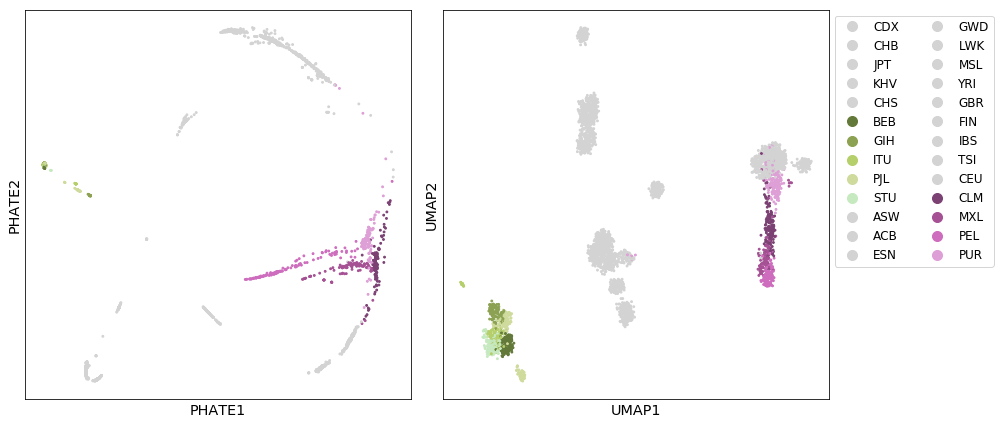

In [39]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

scprep.plot.scatter2d(data_phate, c=pop_labels, cmap=gr_pu_cmap, 
                      ticks=False, label_prefix='PHATE', ax=axes[0], legend=False)

scprep.plot.scatter2d(data_umap, c=pop_labels, cmap=gr_pu_cmap, 
                      ticks=False, label_prefix='UMAP', ax=axes[1],legend_anchor=(1,1))

fig.tight_layout()
#fig.savefig('../img/PHATE_vs_UMAP.pop.png', dpi=300)

In [40]:
from scipy.spatial.distance import pdist, squareform

In [41]:
pu_dists = pdist(transposed_genotype_matrix[purple_inds])

gr_dists = pdist(transposed_genotype_matrix[green_inds])

Text(0.5, 1.0, 'Pairwise distances')

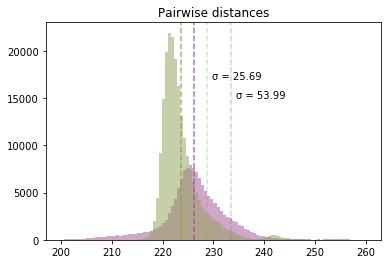

In [62]:
fig, ax = plt.subplots(1,figsize=(6,4))

ax.hist(pu_dists, bins=100, range=(200,260), color='#a55194', alpha=0.5)

ax.axvline(np.mean(pu_dists),                    color='#a55194', alpha=0.8, linestyle='--')
ax.axvline(np.mean(pu_dists) + np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(pu_dists) - np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
ax.text(np.mean(pu_dists) + np.std(pu_dists) + 1, 15000, 'σ = {:.2f}'.format(np.var(pu_dists)))

ax.hist(gr_dists, bins=100, range=(200,260), color='#8ca252', alpha=0.5)
ax.axvline(np.mean(gr_dists),                    color='#8ca252', alpha=0.8, linestyle='--')
ax.axvline(np.mean(gr_dists) + np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(gr_dists) - np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')

ax.text(np.mean(gr_dists) + np.std(gr_dists) + 1, 17000, 'σ = {:.2f}'.format(np.var(gr_dists)))

ax.set_title('Pairwise distances')

In [63]:
pu_dists = pdist(data_phate[purple_inds])

gr_dists = pdist(data_phate[green_inds])

Text(0.5, 1.0, 'Pairwise distances')

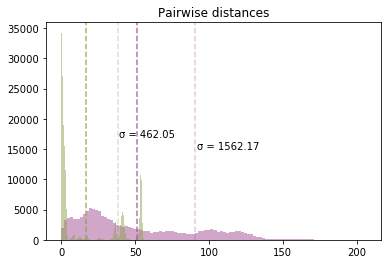

In [65]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.hist(pu_dists, bins=100, color='#a55194', alpha=0.5)

ax.axvline(np.mean(pu_dists),                    color='#a55194', alpha=0.8, linestyle='--')
ax.axvline(np.mean(pu_dists) + np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(pu_dists) - np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
ax.text(np.mean(pu_dists) + np.std(pu_dists) + 1, 15000, 'σ = {:.2f}'.format(np.var(pu_dists)))

ax.hist(gr_dists, bins=100, color='#8ca252', alpha=0.5)
ax.axvline(np.mean(gr_dists),                    color='#8ca252', alpha=0.8, linestyle='--')
ax.axvline(np.mean(gr_dists) + np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(gr_dists) - np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')

ax.text(np.mean(gr_dists) + np.std(gr_dists) + 1, 17000, 'σ = {:.2f}'.format(np.var(gr_dists)))

ax.set_title('Pairwise distances')

In [66]:
pu_dists = pdist(data_umap[purple_inds])

gr_dists = pdist(data_umap[green_inds])

Text(0.5, 1.0, 'Pairwise distances')

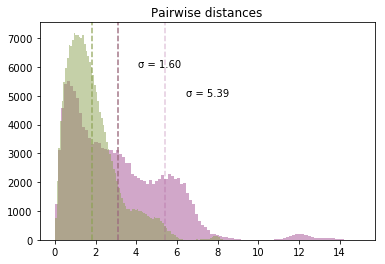

In [68]:
fig, ax = plt.subplots(1, figsize=(6,4))

ax.hist(pu_dists, bins=100, color='#a55194', alpha=0.5)

ax.axvline(np.mean(pu_dists),                    color='#a55194', alpha=0.8, linestyle='--')
ax.axvline(np.mean(pu_dists) + np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(pu_dists) - np.std(pu_dists), color='#a55194', alpha=0.3, linestyle='--')
ax.text(np.mean(pu_dists) + np.std(pu_dists) + 1, 5000, 'σ = {:.2f}'.format(np.var(pu_dists)))

ax.hist(gr_dists, bins=100, color='#8ca252', alpha=0.5)
ax.axvline(np.mean(gr_dists),                    color='#8ca252', alpha=0.8, linestyle='--')
ax.axvline(np.mean(gr_dists) + np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')
#ax.axvline(np.mean(gr_dists) - np.std(gr_dists), color='#8ca252', alpha=0.3, linestyle='--')

ax.text(np.mean(gr_dists) + np.std(gr_dists) + 1, 6000, 'σ = {:.2f}'.format(np.var(gr_dists)))

ax.set_title('Pairwise distances')